## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata,study_results,on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
count_mice = combined_df['Mouse ID'].nunique()
count_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse_df = combined_df[combined_df.duplicated(subset=['Mouse ID','Timepoint'])]
dup_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = combined_df.drop_duplicates(subset=['Mouse ID'],keep='last')
clean_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [6]:
# Checking the number of mice in the clean DataFrame.
count_clean = clean_mouse_df['Mouse ID'].nunique()
count_clean

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
clean_mouse_group = clean_mouse_df.groupby('Drug Regimen')
sum_table = clean_mouse_group.describe()
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
#mean
mean_mouse_ser = clean_mouse_group.mean()['Tumor Volume (mm3)']

#median
median_mouse_ser = clean_mouse_group.median()['Tumor Volume (mm3)']

#variance
var_mouse_ser = clean_mouse_group.var()['Tumor Volume (mm3)']

#standard deviation, I didn't want to do a bunch of for loops and calculations so I used the describe function here [Remove note]
std_mouse_ser = sum_table['Tumor Volume (mm3)']['std']

#SEM
regList = []
regSem = []
#build list of regimens and sort alphabetically
for regimen in clean_mouse_df['Drug Regimen']:
    if regimen not in regList:
        regList.append(regimen)
regList = sorted(regList)

#Get the standard error of mean for each regimen in regimen list and append to Sem list
for regimen in regList:
    temp_df = clean_mouse_df.loc[clean_mouse_df['Drug Regimen'] == regimen]
    regData = temp_df['Tumor Volume (mm3)']
    regSem_regimen = st.sem(regData)
    regSem.append(regSem_regimen)

# Assemble the resulting series into a single summary dataframe.
sum_stats_dict ={
    'Regimen': regList,
    'Mean': mean_mouse_ser.values, 
    'Median': median_mouse_ser.values,
    'Variance': var_mouse_ser.values,
    'Standard Dev': std_mouse_ser.values,
    'SEM': regSem
}
sum_stats_df = pd.DataFrame(data=sum_stats_dict)
sum_stats_df

,Regimen,Mean,Median,Variance,Standard Dev,SEM
0,Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
1,Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
2,Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
3,Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
4,Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
5,Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
6,Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
7,Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
8,Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056
9,Zoniferol,59.181258,61.840058,76.862027,8.767099,1.753420


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
print(sum_stats_df)

# Using the aggregation method, produce the same summary statistics in a single line
clean_mouse_group.agg(['sum','mean','var','std','sem'])

     Regimen       Mean     Median    Variance  Standard Dev       SEM
0  Capomulin  36.667568  38.125164   32.663378      5.715188  1.143038
1   Ceftamin  57.753977  59.851956   69.982735      8.365568  1.673114
2  Infubinol  58.178246  60.165180   74.010875      8.602957  1.720591
3   Ketapril  62.806191  64.487812   98.921330      9.945920  1.989184
4   Naftisol  61.205757  63.283288  106.029927     10.297083  2.059417
5    Placebo  60.508414  62.030594   78.759797      8.874672  1.774934
6   Propriva  56.736964  55.841410   69.349002      8.327605  1.665521
7   Ramicane  36.191390  36.561652   32.166354      5.671539  1.134308
8   Stelasyn  61.001707  62.192350   90.331586      9.504293  1.940056
9  Zoniferol  59.181258  61.840058   76.862027      8.767099  1.753420


Age_months                                        Weight (g)  \
                    sum    mean        var       std       sem        sum   
Drug Regimen                                                                
Capomulin           351  14.040  61.623333  7.850053  1.570011        503   
Ceftamin            320  12.800  65.833333  8.113774  1.622755        685   
Infubinol           410  16.400  55.416667  7.444237  1.488847        683   
Ketapril            368  14.720  41.876667  6.471218  1.294244        702   
Naftisol            306  12.240  50.023333  7.072718  1.414544        681   
Placebo             267  10.680  43.393333  6.587362  1.317472        701   
Propriva            247   9.880  51.693333  7.189808  1.437962        681   
Ramicane            271  10.840  38.973333  6.242863  1.248573        500   
Stelasyn            315  13.125  59.331522  7.702696  1.572306        669   
Zoniferol           315  12.600  37.333333  6.110101  1.222020        698   

                                                     ... Tumor Volume (mm3)  \
                mean        var       std       sem  ...                sum   
Drug Regimen                                         ...                      
Capomulin     20.120   8.193333  2.862400  0.572480  ...         916.689193   
Ceftamin      27.400   2.833333  1.683251  0.336650  ...        1443.849421   
Infubinol     27.320   4.726667  2.174090  0.434818  ...        1454.456145   
Ketapril      28.080   3.493333  1.869046  0.373809  ...        1570.154786   
Naftisol      27.240   2.356667  1.535144  0.307029  ...        1530.143925   
Placebo       28.040   3.790000  1.946792  0.389358  ...        1512.710359   
Propriva      27.240   2.940000  1.714643  0.342929  ...        1418.424090   
Ramicane      20.000  11.250000  3.354102  0.670820  ...         904.784761   
Stelasyn      27.875   2.809783  1.676241  0.342161  ...        1464.040958   
Zoniferol     27.920   2.326667  1.525341  0.305068  ...        1479.531444   

                                                         Metastatic Sites  \
                   mean         var        std       sem              sum   
Drug Regimen                                                                
Capomulin     36.667568   32.663378   5.715188  1.143038               32   
Ceftamin      57.753977   69.982735   8.365568  1.673114               43   
Infubinol     58.178246   74.010875   8.602957  1.720591               40   
Ketapril      62.806191   98.921330   9.945920  1.989184               48   
Naftisol      61.205757  106.029927  10.297083  2.059417               50   
Placebo       60.508414   78.759797   8.874672  1.774934               52   
Propriva      56.736964   69.349002   8.327605  1.665521               39   
Ramicane      36.191390   32.166354   5.671539  1.134308               30   
Stelasyn      61.001707   90.331586   9.504293  1.940056               35   
Zoniferol     59.181258   76.862027   8.767099  1.753420               50   

                                                      
                  mean       var       std       sem  
Drug Regimen                                          
Capomulin     1.280000  0.960000  0.979796  0.195959  
Ceftamin      1.720000  2.043333  1.429452  0.285890  
Infubinol     1.600000  1.500000  1.224745  0.244949  
Ketapril      1.920000  2.743333  1.656301  0.331260  
Naftisol      2.000000  1.833333  1.354006  0.270801  
Placebo       2.080000  2.243333  1.497776  0.299555  
Propriva      1.560000  1.840000  1.356466  0.271293  
Ramicane      1.200000  0.750000  0.866025  0.173205  
Stelasyn      1.458333  1.128623  1.062367  0.216855  
Zoniferol     2.000000  2.250000  1.500000  0.300000  

[10 rows x 25 columns]

## Bar and Pie Charts

<AxesSubplot:title={'center':'Number of Timepoints Recorded by Drug Regimen'}, ylabel='Timepoints Recorded'>

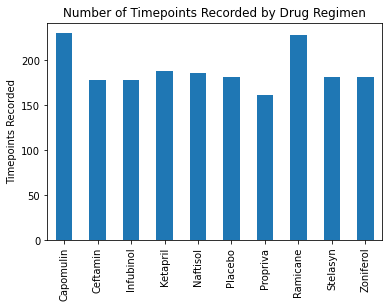

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#Note: combined_df from part 1 has one row per timepoint recorded
combined_df['Drug Regimen'].value_counts().sort_index().plot.bar(ylabel='Timepoints Recorded', title= 'Number of Timepoints Recorded by Drug Regimen')

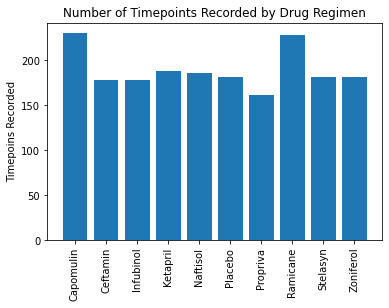

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#Get a count of timepoints for each regimen
mice_timepoints = combined_df['Drug Regimen'].value_counts() #combined has timepoints before duplicate entries were cleaned
mice_timepoints.sort_index(inplace=True) #personal preference to make it alphabetical

#create bar chart
plt.bar(mice_timepoints.index, mice_timepoints.values)
plt.title("Number of Timepoints Recorded by Drug Regimen")
plt.ylabel("Timepoins Recorded")
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:title={'center':'Sex Distribution of Mice Tested'}, ylabel='Sex'>

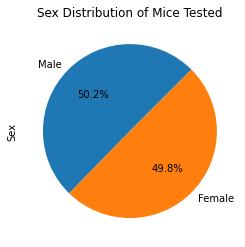

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#Note: clean_mouse_df has one row for each unique mouse to avoid duplication
sex_dist = clean_mouse_df['Sex'].value_counts()
sex_dist.plot.pie(title='Sex Distribution of Mice Tested', autopct="%1.1f%%", startangle=45)


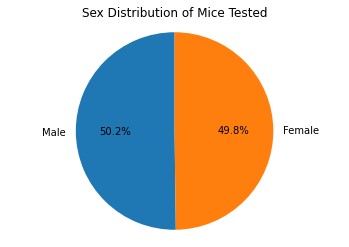

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_dist.values, labels=sex_dist.index, autopct="%1.1f%%", startangle=90)
plt.title("Sex Distribution of Mice Tested")
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Put treatments into a list for for loop (and later for plot labels) - NOTE: This was moved from the next cell for easier usage
treatment_list = ['Capomulin','Ramicane','Infubinol','Ceftamin']
treatment_list.sort()

# Capomulin, Ramicane, Infubinol, and Ceftamin
quart_mouse_df = combined_df[combined_df['Drug Regimen'].isin(treatment_list)]

# Start by getting the last (greatest) timepoint for each mouse
quart_mousemax_df = pd.DataFrame(quart_mouse_df.groupby(['Mouse ID'])['Timepoint'].max())
quart_mousemax_df.rename(columns={'Timepoint':'Max Timepoint'}, inplace=True)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
quart_merged_df = pd.merge(quart_mouse_df,quart_mousemax_df, on='Mouse ID')
quart_merged_df = quart_merged_df.loc[quart_merged_df['Timepoint'] == quart_merged_df['Max Timepoint']]
quart_merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
9,k403,Ramicane,Male,21,16,45,22.050126,1,45
19,s185,Capomulin,Female,3,17,45,23.343598,1,45
29,x401,Capomulin,Female,16,15,45,28.484033,0,45
39,m601,Capomulin,Male,22,17,45,28.430964,1,45
49,g791,Ramicane,Male,11,16,45,29.128472,1,45


In [14]:
# Create empty list to fill with tumor vol data (for plotting)
treatment_quarts_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_list:
    #Create a dictionary for holding the IQR data needed
    drug_value_dict = {'DrugType': treatment}

    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_value_df = quart_merged_df.loc[quart_merged_df['Drug Regimen'] == treatment]
    drug_values_ser = drug_value_df['Tumor Volume (mm3)']
    
    # add subset 
    drug_value_dict['Data'] = drug_values_ser.values
    
    # Determine outliers using upper and lower bounds
    quartiles = drug_values_ser.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    drug_value_dict.update({'LowerBound': lower_bound, 'UpperBound': upper_bound})
    
    #added dictionary to values list for later usage
    treatment_quarts_data.append(drug_value_dict)
    
treatment_quarts_df=pd.DataFrame.from_dict(treatment_quarts_data)
treatment_quarts_df

,DrugType,Data,LowerBound,UpperBound
0,Capomulin,"[23.34359787, 28.48403281, 28.43096411, 30.485...",20.704562,51.832015
1,Ceftamin,"[62.99935619, 45.0, 56.05774909, 55.74282869, ...",25.355450,87.666458
2,Infubinol,"[67.97341878, 65.52574285, 57.03186187, 66.083...",36.832905,82.741446
3,Ramicane,"[22.05012627, 29.12847181, 30.27623175, 30.564...",17.912664,54.306811


C:\Users\EDUCAT~1\AppData\Local\Temp/ipykernel_21320/399344660.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(treatment_quarts_df['DrugType'])


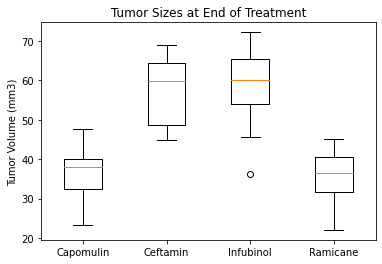

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()
ax.set_title('Tumor Sizes at End of Treatment')
ax.set_xticklabels(treatment_quarts_df['DrugType'])
ax.set_ylabel('Tumor Volume (mm3)')
ax.boxplot(treatment_quarts_df['Data'])
plt.show()

## Line and Scatter Plots

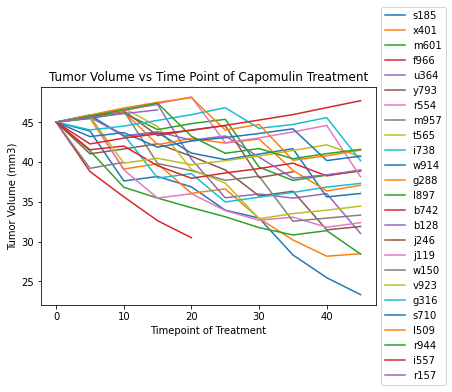

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Got all entries from the original combined dataframe restricted by Capomulin
capomulin_df = combined_df.loc[combined_df['Drug Regimen'] == 'Capomulin']

#Gather list of all unique mouse IDs for looping over timepoints
mouse_list = capomulin_df['Mouse ID'].unique()

#for each mouse, plot the line plot for that mouse
for mouse in mouse_list:
    mouse_df = capomulin_df.loc[capomulin_df['Mouse ID'] == mouse]
    mouse_xaxis = mouse_df['Timepoint']
    mouse_yaxis = mouse_df['Tumor Volume (mm3)']
    plt.plot(mouse_xaxis,mouse_yaxis, label=mouse)

#Display the line plots
plt.title('Tumor Volume vs Time Point of Capomulin Treatment')
plt.xlabel('Timepoint of Treatment')
plt.ylabel('Tumor Volume (mm3)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

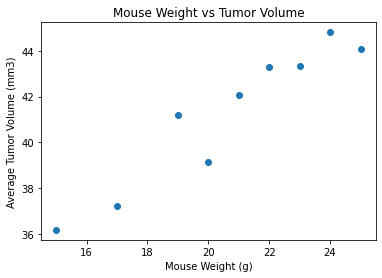

In [32]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#Get a list of unique mouse weights
mouse_weight = capomulin_df['Weight (g)'].unique()

#for each weight, calculate the average tumor size
tumor_size = [] #empty list to store data

for weight in mouse_weight:
    measurements = capomulin_df.loc[capomulin_df['Weight (g)'] == weight]['Tumor Volume (mm3)']
    tumor_size.append(measurements.mean())

plt.scatter(mouse_weight,tumor_size)

plt.title('Mouse Weight vs Tumor Volume')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

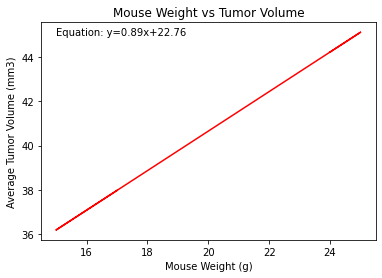

In [44]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#get regression values
mouse_slope, mouse_int, mouse_r, mouse_p, mouse_std_err = st.linregress(mouse_weight,tumor_size)

#create fit line equation
fit = mouse_slope * mouse_weight + mouse_int

#create visual for presentation
line_eq = f'y={round(mouse_slope,2)}x+{round(mouse_int,2)}'

#plot the line
plt.plot(mouse_weight,fit,'r-')
plt.annotate(f'Equation: {line_eq}', xy=(15,45))
plt.title('Mouse Weight vs Tumor Volume')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()